# aitools examples

## mlearn.classify: Predicting pirate attack success with different classifiers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


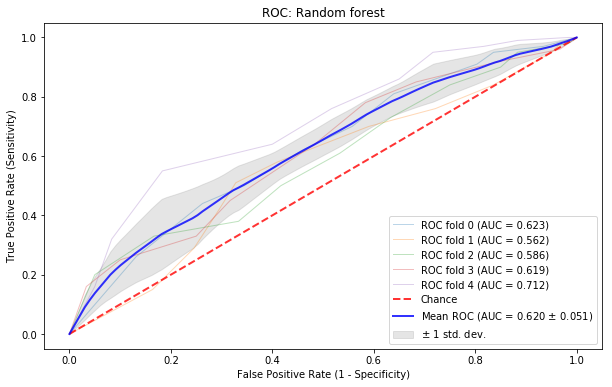

Random forest train-test split metrics:
Holdout AUC score: 0.618

Holdout classification report:
               precision    recall  f1-score   support

           0      0.544     0.490     0.516       100
           1      0.662     0.709     0.685       141

   micro avg      0.618     0.618     0.618       241
   macro avg      0.603     0.600     0.600       241
weighted avg      0.613     0.618     0.615       241



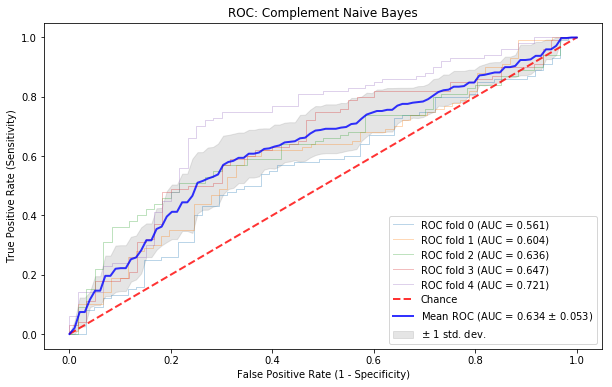

Complement Naive Bayes train-test split metrics:
Holdout AUC score: 0.660

Holdout classification report:
               precision    recall  f1-score   support

           0      0.582     0.640     0.610       100
           1      0.725     0.674     0.699       141

   micro avg      0.660     0.660     0.660       241
   macro avg      0.654     0.657     0.654       241
weighted avg      0.666     0.660     0.662       241



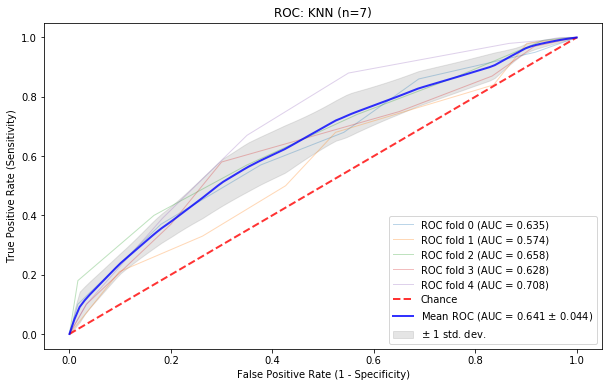

KNN (n=7) train-test split metrics:
Holdout AUC score: 0.631

Holdout classification report:
               precision    recall  f1-score   support

           0      0.582     0.390     0.467       100
           1      0.649     0.801     0.717       141

   micro avg      0.631     0.631     0.631       241
   macro avg      0.616     0.596     0.592       241
weighted avg      0.621     0.631     0.614       241



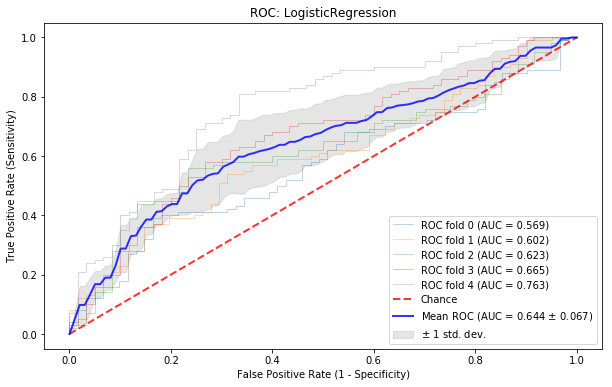

LogisticRegression train-test split metrics:
Holdout AUC score: 0.643

Holdout classification report:
               precision    recall  f1-score   support

           0      0.565     0.610     0.587       100
           1      0.707     0.667     0.686       141

   micro avg      0.643     0.643     0.643       241
   macro avg      0.636     0.638     0.636       241
weighted avg      0.648     0.643     0.645       241



,classifier,auc_cv,auc_std,auc_holdout
3,LogisticRegression,0.643960,0.067017,0.643154
2,KNN (n=7),0.640932,0.043510,0.630705
1,Complement Naive Bayes,0.633535,0.052786,0.659751
0,Random forest,0.620281,0.051041,0.618257


In [10]:
%load_ext autoreload
%autoreload
%matplotlib inline

from aitools.mlearn import create_pipeline, classify
from aitools.plot import roc_cv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', category= FutureWarning)

df_pirate = pd.read_csv('data/pirate_data.csv')

# Define features 
features = ['LAT', 'LONG', 'ATTACKS', 'REGION', 'COUNTRY', 
            'VESSEL TYPE', 'VESSEL ACTIVITY LOCATION', 
            'TIMEZONE', 'TIME OF DAY']

X = df_pirate[features]
y = df_pirate['ATTACK SUCCESS']

# Test classifiers
classifiers = {
    'Random forest': RandomForestClassifier(random_state=42),
    'Complement Naive Bayes': ComplementNB(),
    'KNN (n=7)': KNeighborsClassifier(n_neighbors=7),
    'LogisticRegression': LogisticRegression(solver='liblinear', class_weight='balanced'),
}

df_scores = pd.DataFrame(columns=['classifier', 'auc_cv', 'auc_std', 'auc_holdout'])
for name, classifier in classifiers.items():
    pipeline = create_pipeline(classifier, X )
    
    auc_cv, auc_std = roc_cv(name, pipeline, X, y)
    
    print('{} train-test split metrics:'.format(name))
    auc_holdout = classify(pipeline, X, y)
    
    row = {'classifier': name, 'auc_holdout': auc_holdout, 'auc_cv': auc_cv, 'auc_std': auc_std}
    df_scores = df_scores.append(row, ignore_index=True)
    
df_scores.sort_values('auc_cv', ascending=False)

## plot: Plot numeric and categorical features against the target variable.

These plots can be helpful for identifying which features are most helpful for classifying the target variable.

In [2]:
from aitools import plot
import pandas as pd

features = ['LAT', 'LONG', 'ATTACKS', 'REGION', 'COUNTRY', 
            'VESSEL TYPE', 'VESSEL ACTIVITY LOCATION', 
            'TIMEZONE', 'TIME OF DAY']
target = 'ATTACK SUCCESS'

df_pirate = pd.read_csv('data/pirate_data.csv')[features + [target]]

In [ ]:
df_pirate['REGION'] = pd.Categorical(df_pirate['REGION'])
df_pirate['ATTACK SUCCESS'] = pd.Categorical(df_pirate['ATTACK SUCCESS'])

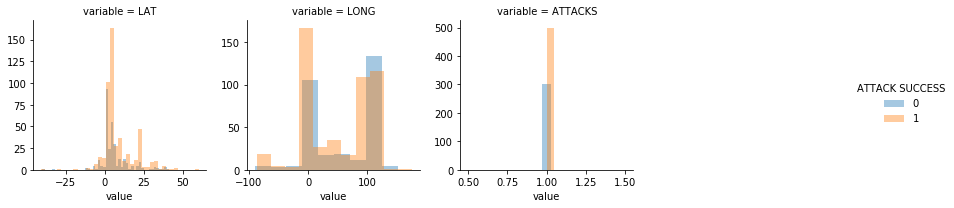

In [4]:
%autoreload
plot.numeric_vs_target(df_pirate, target)

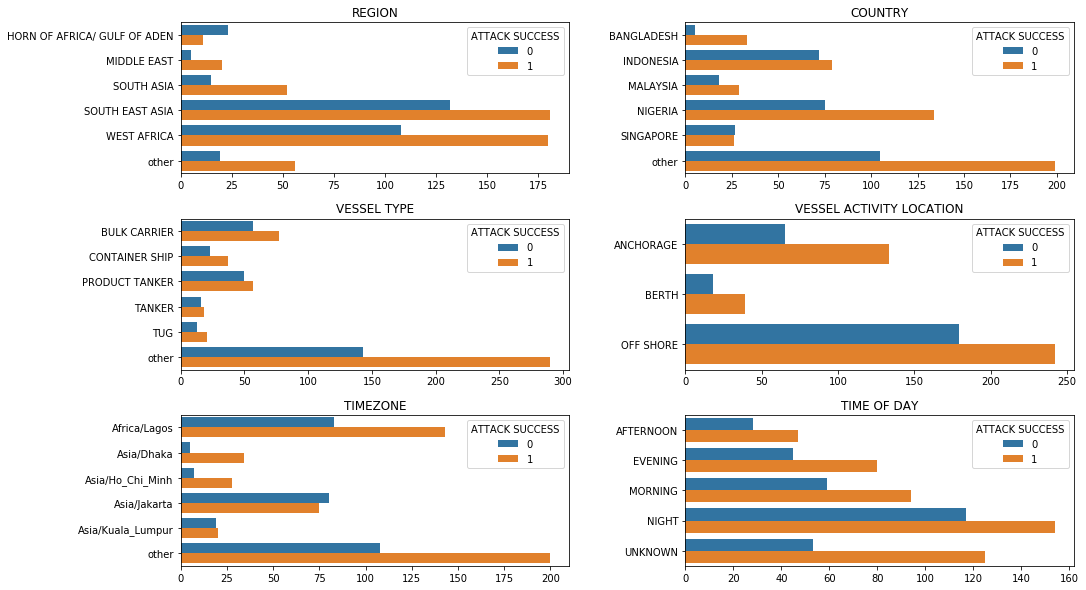

In [5]:
%autoreload
plot.categorical_vs_target(df_pirate, target, n_largest=5)